# Exponential Distribution 

In a Poisson process, an exponential distribution is a continuous probability distribution that describes the time between events (success, failure, arrival, etc.). It;s a key tool in the field of statistics, especially in reliability engineering and queuring theory. 


## Key Characteristics of the Exponential Distribution:

1. **Probability Density Function (PDF)**:
The probability density function of the exponential distribution is defined as:

$$
f(x; \lambda) = \lambda e^{-\lambda x} \quad \text{for } x \geq 0
$$

Here, 𝜆 is the rate parameter of the distribution, which is the reciprocal of the mean. The rate parameter indicates how frequently an event occurs, and 𝑥 represents the time between events.

2. **Cumulative Distribution Function (CDF)**:

$$
F(x; \lambda) = 1 - e^{-\lambda x} \quad \text{for } x \geq 0
$$

3. **Mean and Variance**:
- Mean (Expected Value): The mean of the exponential distribution is 1/λ.

- Variance: The variance is 1/λ^2

4. Memoryless Property:
- One of the most notable properties of the exponential distribution is that it is memoryless. This means that the probability of an event occurring in the future is independent of any history. Mathematically, this property is defines as:

$$
P(X > s + t \mid X > s) = P(X > t)
$$

for any s, t ≥ 0. This implies that the future probability distribution of the time unitl the event occurs does not depend on how much time has already passed. 

## Applications of the Exponential Distribution:
1. **Reliability Engineering**:
- Used to model the time until failure of devices and systems, assuming that the rate of failure is constant over time.

2. **Queuing Theory**:
- Models the time between arrivals of customers to a service facility when arrivals occur randomly and independently at a constant average rate. 

3. **Telecommunications**:
- Used to model the time between signals, data packets, or other communications, assuming a constant average rate of signal occurrence.

4. **Finance and Risk Management**:
- Applied to model the time until default in credit risk, under the assumption of a constant hazard rate.

5. **Ecology**:
- Used to model the time until events such as the death of organisms or other changes in ecological systems.


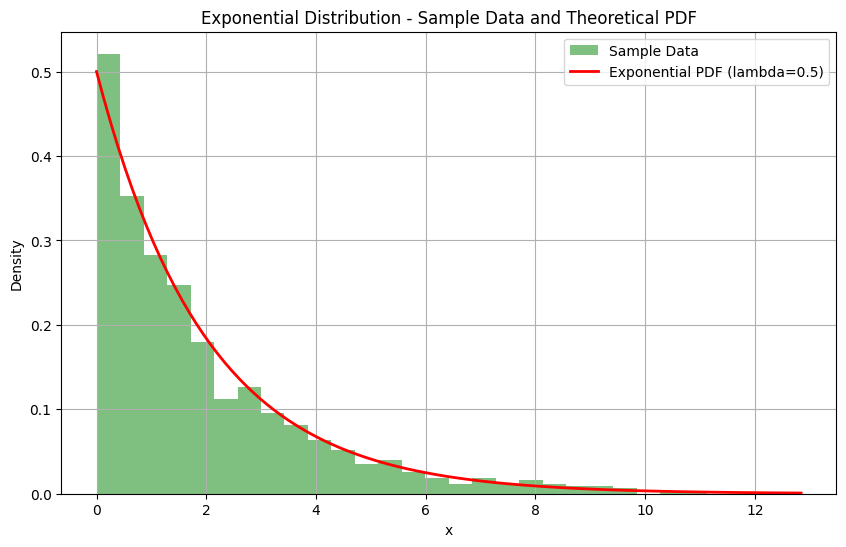

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Set the rate parameter (lambda)
rate = 0.5  # This is lambda in the f(x; lambda) definition
scale = 1 / rate  # The scale parameter for scipy's exponential is 1/lambda

# Generate random data from the exponential distribution
data = expon.rvs(scale=scale, size=1000)

# Plot the histogram of the data
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, color='g', label='Sample Data')

# Generate values for the PDF plot
x = np.linspace(0, max(data), 100)
pdf = expon.pdf(x, scale=scale)

# Plot the theoretical PDF
plt.plot(x, pdf, 'r-', lw=2, label=f'Exponential PDF (lambda={rate})')

plt.title('Exponential Distribution - Sample Data and Theoretical PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


**Calculating Probabilities**
- Let's calculate the probability that the time between events is less than a certain value using the CDF of the exponential distribution.

In [3]:
from scipy.stats import expon

# Rate parameter (lambda)
rate = 0.5
scale = 1 / rate

# Calculate P(X <= x) for x = 1
x = 1
cdf_value = expon.cdf(x, scale=scale)
print(f"P(X <= {x}): {cdf_value:.4f}")

# Calculate P(X > x) for x = 1
p_greater_than_x = 1 - cdf_value
print(f"P(X > {x}): {p_greater_than_x:.4f}")


P(X <= 1): 0.3935
P(X > 1): 0.6065


**P(X <= 1): 0.3935**
- This value represents the probability that the time until the next event occurs is less than or equal to 1 time unit. 
- There's approximately a 39.35% chance that the event (whatever it may be, such as a failure of a component, arrival of a customer, etc.) will happen within 1 time unit.

**P(X > 1): 0.6065**
- This value represents the probability that the time until the next event is more than 1 time unit. This tells us:
    - There's about a 60.65% chance that the event will not happen within 1 time unit and will take longer than that. 


**Practical Examples**

If you're managing a service that expects a customer every 2 minutes on average (like a call center or checkout line), these probabilities tell you:

- In any given minute, there's roughly a 39.35% chance you'll get a customer.
- There's a 60.65% chance that you'll wait longer than a minute for the next customer.


**Memoryless Property Demonstration** 

In [4]:
# Parameters
s = 1
t = 2
rate = 0.5
scale = 1 / rate

# P(X > s + t | X > s) = P(X > t)
# Using the memoryless property to calculate the conditional probability
p_s_plus_t_given_s = np.exp(-rate * t)
print(f"P(X > {s + t} | X > {s}): {p_s_plus_t_given_s:.4f}")

# Direct calculation of P(X > t)
p_greater_than_t = np.exp(-rate * t)
print(f"P(X > {t}): {p_greater_than_t:.4f}")


P(X > 3 | X > 1): 0.3679
P(X > 2): 0.3679


- P(X > 3 \mid X > 1): 0.3679: This is the probability that the time until the next event is more than 3 units, given that 1 unit of time has already passed. According to the memoryless property, this is the same as the probability of waiting more than 2 additional units without conditioning on the first unit. This conditional probability ignores the first unit of time already waited, focusing only on the future beyond that point.
- P(X > 2): 0.3679: This is the probability of waiting more than 2 time units from the start, demonstrating that the distribution "forgets" the initial waiting period of 1 unit.

**Mean and Variance of Exponential Distribution**

In [5]:
from scipy.stats import expon

# Rate parameter (lambda)
rate = 0.5
scale = 1 / rate

# Mean and variance from the theoretical properties
mean_theoretical = expon.mean(scale=scale)
variance_theoretical = expon.var(scale=scale)

print(f"Theoretical Mean: {mean_theoretical:.4f}")
print(f"Theoretical Variance: {variance_theoretical:.4f}")

# Sample mean and variance
data = expon.rvs(scale=scale, size=1000)
sample_mean = np.mean(data)
sample_variance = np.var(data)

print(f"Sample Mean: {sample_mean:.4f}")
print(f"Sample Variance: {sample_variance:.4f}")


Theoretical Mean: 2.0000
Theoretical Variance: 4.0000
Sample Mean: 1.9573
Sample Variance: 3.9291


- **Sample Mean**: 1.9573 - This is the average of the sample data generated from the distribution. It's close to the theoretical mean, which shows that the sample is reasonably representative of the distribution.
- **Sample Variance**: 3.9291 - Similar to the sample mean, the sample variance is close to the theoretical variance. The slight difference from the theoretical value is expected due to sampling variability.

- This means 
    - **Sample Close to Theoretical**: The closeness of the sample mean and variance to the theoretical values indicates that the sample data is a good representation of the exponential distribution.
    - **Reliability of Estimations**: In practical scenarios, such as modeling waiting times or life expectancy in reliability engineering, the reliability of statistical estimations from sample data is crucial. This script demonstrates how empirical data can align closely with theoretical predictions, which is valuable for confirming that the data behaves as expected according to the exponential model.

### Compare and contrast the exponential distribution to the Poisson distribution.



While both are related to rare/random events, the Poisson distribution models the number of discrete events in a fixed interval of time or space, whereas the exponential distribution models the time between consecutive events in a Poisson process.